In [1]:
import numpy as np
import pandas as pd
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import arviz as az
import scipy.stats as st

colors (#0072B2 & #D55E00) are part of the Okabe-Ito, specifically designed to be colorblind-friendly.

In [35]:
data = pd.read_csv("data/all_data.csv")
data

,code,block,trial,input_noise_magnitude,inpnoise_ascending,feedback,SoC,avg_dist_trialwise,InternalLC,ExternalLC,CESDR,CESDR_cat,negative_feedback,positive_feedback
0,1,1,1,2.0,1,positive,3,45.980288,3.5,1.5,31,1,0,1
1,1,1,2,2.0,1,negative,5,27.928305,3.5,1.5,31,1,1,0
2,1,1,3,2.0,1,positive,3,51.842082,3.5,1.5,31,1,0,1
3,1,1,4,2.0,1,negative,2,44.982707,3.5,1.5,31,1,1,0
4,1,1,5,2.0,1,positive,6,35.417424,3.5,1.5,31,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,9,8,26,2.0,4,positive,4,61.940248,4.5,2.5,11,0,0,1
11516,9,8,27,2.0,4,negative,3,61.907699,4.5,2.5,11,0,1,0
11517,9,8,28,2.0,4,negative,3,49.690419,4.5,2.5,11,0,1,0
11518,9,8,29,2.0,4,positive,4,66.260599,4.5,2.5,11,0,0,1


### Model 1: predicting performance (average distance in pixel)

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                   3.259e+00  3.583e-02  5.232e+01  90.972  < 2e-16 ***
input_noise_magnitude2        5.844e-01  2.565e-02  6.673e+01  22.786  < 2e-16 ***
block                        -2.058e-02  1.580e-03  1.147e+04 -13.028  < 2e-16 ***
input_noise_magnitude2:block  1.116e-02  2.219e-03  1.147e+04   5.029 5.01e-07 ***

transformation required: exp()

### Plotting Model 1:

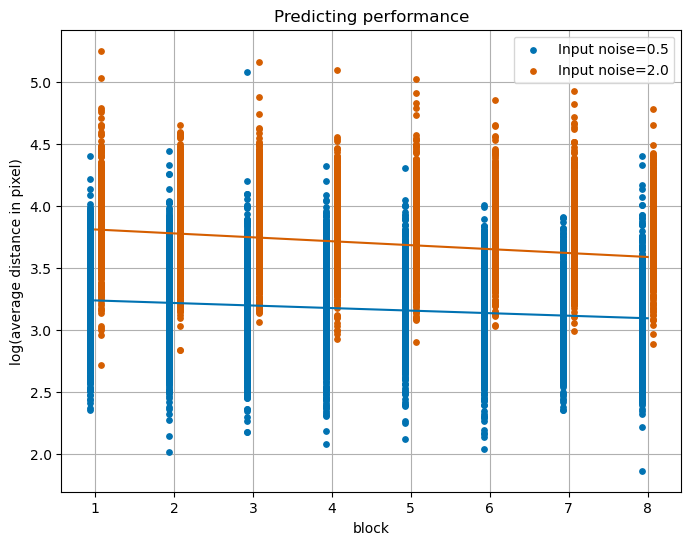

In [61]:
# Separate data based on input_noise_magnitude
data_1 = data[data["input_noise_magnitude"] == 0.5]
data_2 = data[data["input_noise_magnitude"] == 2.0]

# Define linear model parameters (replace with your actual intercept and slope)
intercept_1, slope_1 = 3.259, -0.02058
intercept_2, slope_2 = 3.259+0.5844, -0.02058-0.01116
# tranformed
#intercept_1, slope_1 = np.exp(3.259), -np.exp(0.02058)
#intercept_2, slope_2 = np.exp(3.259+0.5844), -np.exp(0.02058*0.01116)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(8, 6))
plt.grid(True)

# scattered data points
plt.scatter(data_1["block"] - 0.07, np.log(data_1["avg_dist_trialwise"]), s=15, color="#0072B2", label=f"Input noise=0.5")
plt.scatter(data_2["block"] + 0.07, np.log(data_2["avg_dist_trialwise"]), s=15, color="#D55E00", label=f"Input noise=2.0")

# linear models
x_range_1 = np.linspace(data_1["block"].min(), data_1["block"].max(), 100)
y_range_1 = intercept_1 + slope_1 * x_range_1
plt.plot(x_range_1, y_range_1, color="#0072B2", linestyle='-')  # np.exp to reach data point scale

x_range_2 = np.linspace(data_2["block"].min(), data_2["block"].max(), 100)
y_range_2 = intercept_2 + slope_2 * x_range_2
plt.plot(x_range_2, y_range_2, color="#D55E00", linestyle='-')  # np.exp to reach data point scale

# Labeling
plt.xlabel("block")
plt.ylabel("log(average distance in pixel)")
plt.legend()
plt.title("Predicting performance")

plt.show()

### Model 2: predicting SoC

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                   2.210e+00  7.613e-02  5.672e+01  29.026  < 2e-16 ***
feedbackpositive              3.680e-02  5.883e-03  1.142e+04   6.256 4.09e-10 ***
feedbacknegative             -8.148e-02  8.749e-03  1.142e+04  -9.314  < 2e-16 ***
input_noise_magnitude2       -2.820e-01  4.549e-02  5.446e+01  -6.199 7.92e-08 ***
ExternalLC                    1.017e-01  3.114e-02  4.800e+01   3.265  0.00202 ** 
CESDR                        -5.459e-04  2.461e-03  4.852e+01  -0.222  0.82536    
block                         6.915e-03  1.616e-03  1.146e+04   4.279 1.89e-05 ***
avg_dist_trialwise           -8.984e-03  2.271e-04  1.147e+04 -39.565  < 2e-16 ***
CESDR:negative_feedback       2.150e-03  5.443e-04  1.142e+04   3.950 7.86e-05 ***
input_noise_magnitude2:block -1.927e-02  2.263e-03  1.145e+04  -8.515  < 2e-16 ***

transformation required: **2